# ANN Regression

### First we read the data and clean it 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../../datasets/kc_house_data.csv')
X = dataset.drop(['price', 'id', 'date', 'zipcode'], axis=1).values
y = dataset['price'].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(len(X_train))
dataset.head()

17290


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Time for the deep learning !

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [3]:
model = Sequential()

In [4]:
model.add(Dense(units = 1000, activation = 'relu', input_dim = X_train.shape[1]))

In [5]:
from keras import regularizers

model.add(Dense(units = 500, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

In [6]:
model.add(Dropout(0.2, seed=0))

In [7]:
model.add(Dense(units = 1, activation = 'relu'))

In [8]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# The model summary !

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              18000     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 519,001
Trainable params: 519,001
Non-trainable params: 0
_________________________________________________________________


# Training process

In [10]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10, verbose=1)

Epoch 1/10
17290/17290 [==============================] - 17s 1ms/step - loss: 148367268333.0480 - mse: 148367327232.0000
Epoch 2/10
17290/17290 [==============================] - 17s 1ms/step - loss: 44410444402.6003 - mse: 44410421248.0000
Epoch 3/10
17290/17290 [==============================] - 18s 1ms/step - loss: 38169507788.6223 - mse: 38169501696.0000
Epoch 4/10
17290/17290 [==============================] - 17s 965us/step - loss: 36514660071.0515 - mse: 36514660352.0000
Epoch 5/10
17290/17290 [==============================] - 17s 957us/step - loss: 35649562349.3441 - mse: 35649544192.0000
Epoch 6/10
17290/17290 [==============================] - 17s 992us/step - loss: 35165793722.0405 - mse: 35165839360.0000
Epoch 7/10
17290/17290 [==============================] - 21s 1ms/step - loss: 34716929297.2678 - mse: 34716954624.0000
Epoch 8/10
17290/17290 [==============================] - 20s 1ms/step - loss: 34244905332.0810 - mse: 34244911104.0000
Epoch 9/10
17290/17290 [========

# Let's see the results

In [11]:
model.evaluate(X_test, y_test)

4323/4323 [==============================] - 0s 75us/step


[28875735372.56905, 28875735040.0]

In [17]:
y_pred = model.predict(X_test)
list(zip(y_pred.flatten(), y_test))[:5]

[(422432.44, 297000.0),
 (1707522.5, 1578000.0),
 (532898.8, 562100.0),
 (601984.2, 631500.0),
 (992198.56, 780000.0)]

(0, 50)

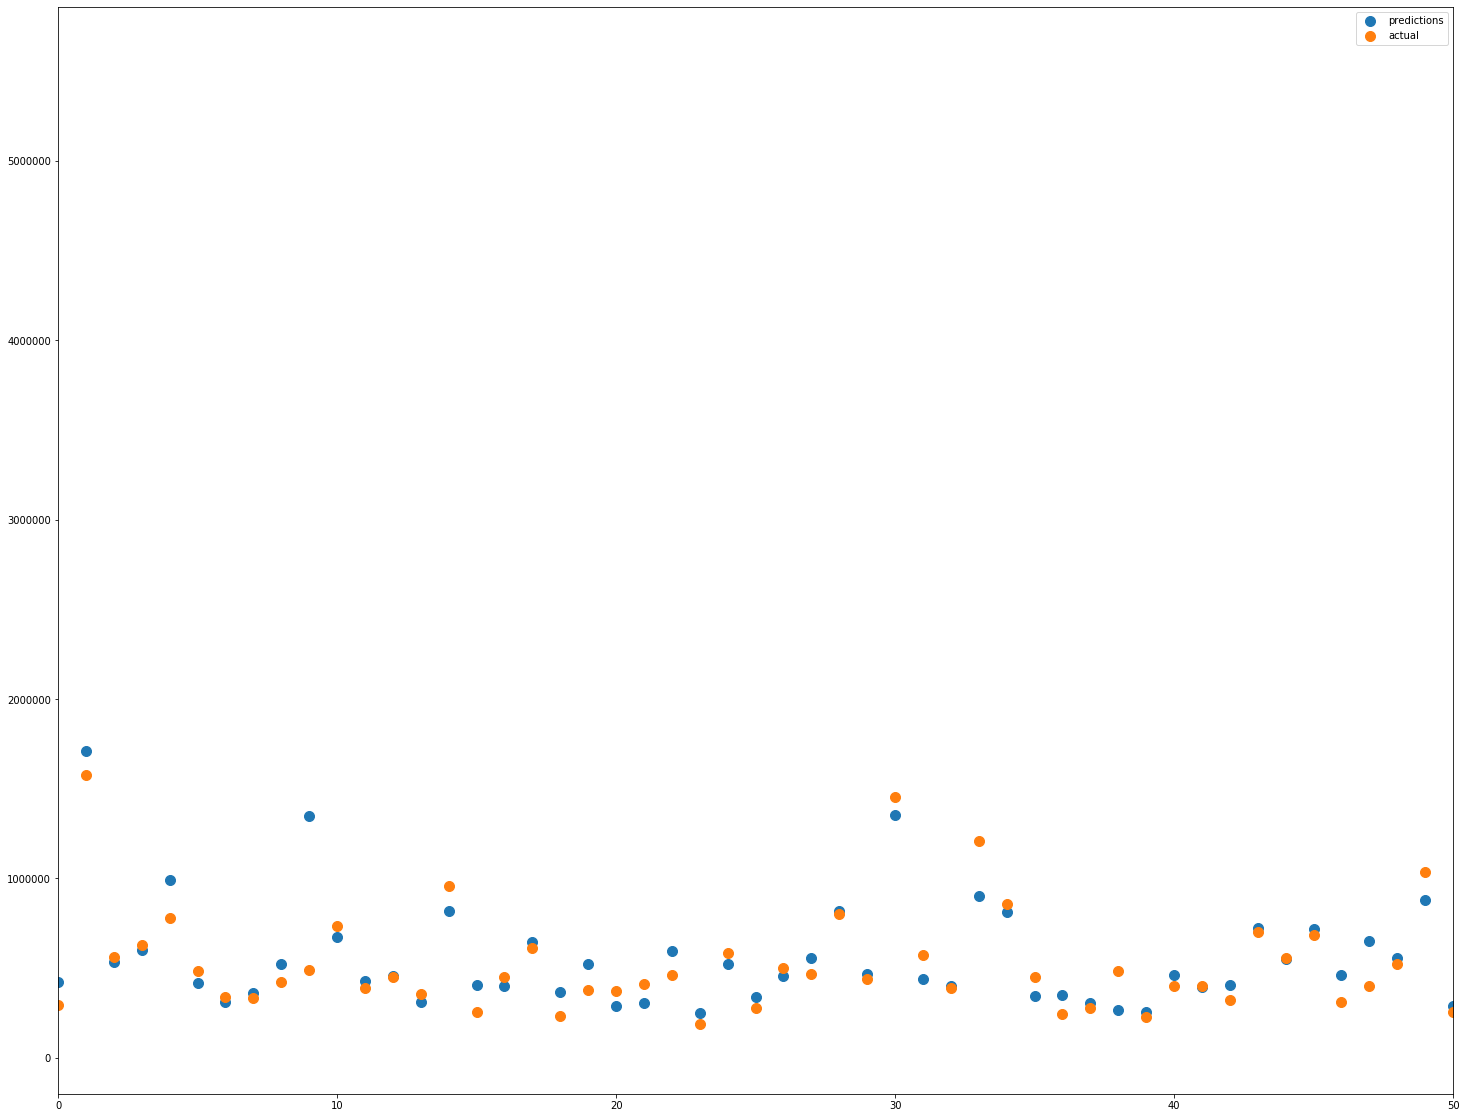

In [31]:
plt.rcParams['figure.figsize'] = (25, 20)
x_in = np.arange(y_pred.shape[0])
plt.scatter(x_in, y_pred.flatten(), label='predictions', s=100)
plt.scatter(x_in, y_test, label='actual', s=100)
plt.legend()
plt.xlim(0, 50)